In [4]:
import sys
get_ipython().system('{sys.executable} -m pip install python-mnist')



In [5]:
from sklearn.datasets import fetch_openml
raw_data, raw_labels = fetch_openml('mnist_784', version=1, return_X_y=True)

In [6]:
print(raw_data.shape)

(70000, 784)


In [7]:
import numpy as np
print(np.max(raw_data))
print(np.unique(raw_labels))

pixel1       0.0
pixel2       0.0
pixel3       0.0
pixel4       0.0
pixel5       0.0
            ... 
pixel780    62.0
pixel781     0.0
pixel782     0.0
pixel783     0.0
pixel784     0.0
Length: 784, dtype: float64
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


5000


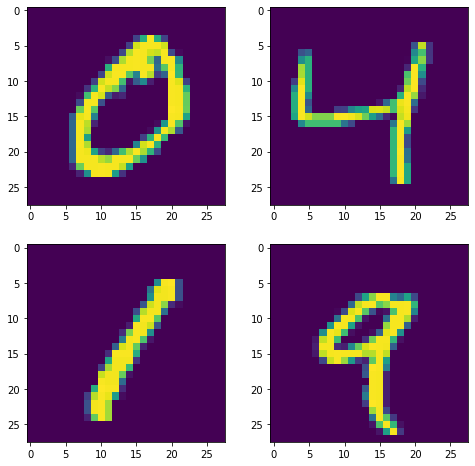

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# selecting a subset of the dataset
nsamples = 5000
data = raw_data[:nsamples]
labels = raw_labels[:nsamples]

# data preprocessing
data = data / 255.
labels = labels.astype('int')
print(data.shape[0])
images = data.values.reshape(data.shape[0], 28, 28)

# a few samples
plt.figure(figsize=(8,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i+1])
#     plt.title('truth: {}'.format(labels[i]))
#     plt.title(labels[index])

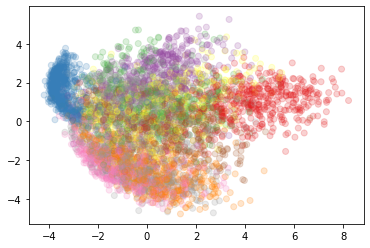

In [9]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
view = pca.fit_transform(data)
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.2, cmap='Set1')

Text(0, 0.5, 't-SNE-2')

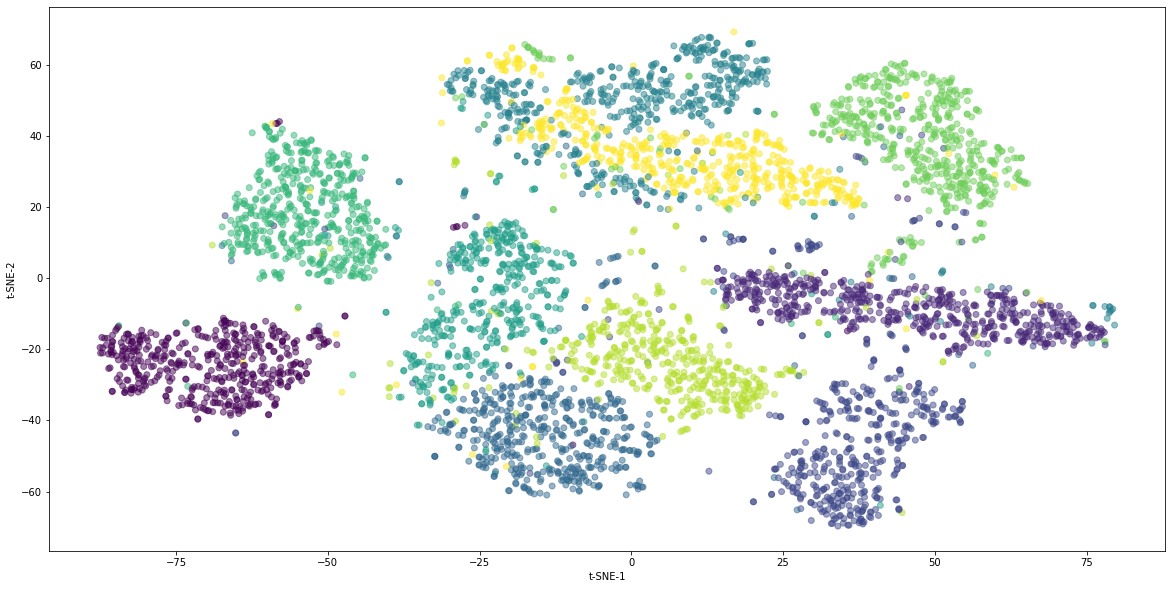

In [10]:
from sklearn.manifold import TSNE
view = TSNE(n_components=2, random_state=123).fit_transform(data)

plt.figure(figsize=(20,10))
plt.scatter(view[:,0], view[:,1], c=labels, alpha=0.5)
plt.xlabel('t-SNE-1')
plt.ylabel('t-SNE-2')

In [11]:
import sys
get_ipython().system('{sys.executable} -m pip install bokeh')

In [12]:
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [13]:
import pandas as pd
df = pd.DataFrame(view, columns=['x','y'])
df['label'] = labels.astype('str')
df

,x,y,label
0,-18.061995,-11.634474,5
1,-64.108856,-28.732725,0
2,-18.635763,55.422031,4
3,69.340981,-9.929567,1
4,3.516019,29.605585,9
...,...,...,...
4995,57.632835,33.337337,7
4996,-4.536728,-53.124714,3
4997,35.464226,-48.921566,2
4998,40.877113,-5.444099,1


In [14]:
# define hover tool
from bokeh.models import HoverTool
hover = HoverTool(
    # we print the class label 
    # and the index in the dataframe
    # in the tooltip
    tooltips = [('label','@label'),
               ('index', '$index')]
)

# create figure
fig_scat = figure(tools=[hover, 'box_zoom', 'crosshair', 'undo'], 
                  plot_width=600)

# bokeh data source from the dataframe
source = ColumnDataSource(df)

# color definition
from bokeh.transform import linear_cmap
from bokeh.palettes import d3
from bokeh.models import CategoricalColorMapper
palette = d3['Category10'][10]
cmap = CategoricalColorMapper(
    factors=df['label'].unique(),
    palette=palette
)

# scatter plot in figure
fig_scat.scatter(
    x='x', y='y', alpha=0.5, 
    color={'field': 'label', 'transform': cmap}, 
    source=source
)

# display below
show(fig_scat)

Text(0.5, 1.0, '0')

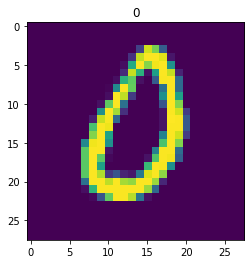

In [15]:
index = 666
plt.imshow(images[index])
plt.title(labels[index])

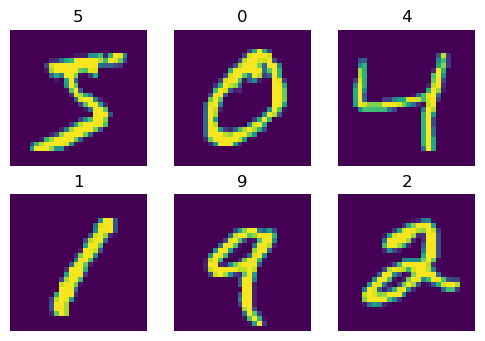

In [29]:
def plot_images(*indices): 
    if len(indices)>6:
        print('please provide at most 6 indices')
        return
    fig = plt.figure(dpi=100)
    for i, index in enumerate(indices):
        fig.add_subplot(2, 3, i+1)
        plt.imshow(images[index])
        plt.title(labels[index])
        plt.axis('off')
        
plot_images(0,1,2,3,4,5)

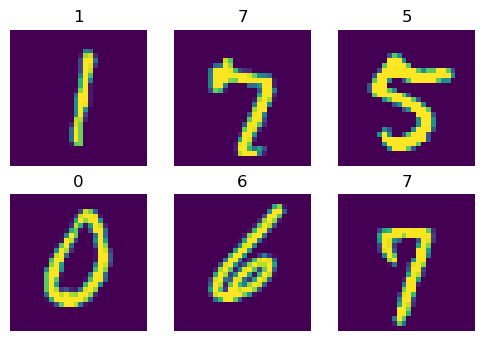

In [30]:
plot_images(2906, 2115,512,666,999,888)